In [1]:
from __future__ import division, print_function, absolute_import
import tflearn
import tensorflow as tf
import numpy
import csv
import matplotlib.pyplot as plt

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
Scipy not supported!


In [2]:
# load data set

In [3]:
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [89]:
# r = numpy.where(Y[1] == 1.0)

In [94]:
# visualize

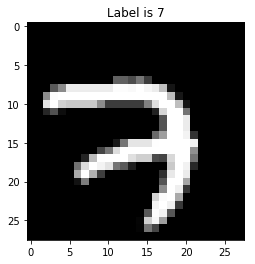

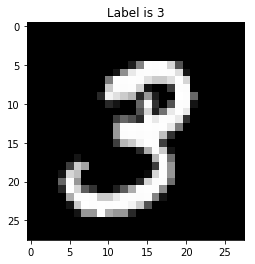

In [95]:
for i in range(2):
    label = numpy.nonzero(Y[i] == 1.0)[0][0]
    pixels = np.reshape(X[i], (28,28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [97]:
# fully connected net

In [4]:
# input
input_layer = tflearn.input_data(shape=[None, 784])

# layer 1 && dropout
dense1 = tflearn.fully_connected(input_layer, 64, activation='tanh', regularizer='L2', weight_decay=0.001)
dropout1 = tflearn.dropout(dense1, 0.8)

# layer 2 && dropout
dense2 = tflearn.fully_connected(dropout1, 64, activation='tanh', regularizer='L2', weight_decay=0.001)
dropout2 = tflearn.dropout(dense2, 0.8)

# output layer
softmax = tflearn.fully_connected(dropout2, 10, activation='softmax')


In [5]:
# optimization method 

sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
top_k = tflearn.metrics.Top_k(3)
net = tflearn.regression(softmax, optimizer=sgd, metric=top_k, loss='categorical_crossentropy')


In [6]:
# training

model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=20, validation_set=(testX, testY), show_metric=True, run_id='dense_model')

Training Step: 17199  | total loss: 0.42289 | time: 2.041s
| SGD | epoch: 020 | loss: 0.42289 - top3: 0.9742 -- iter: 54976/55000
Training Step: 17200  | total loss: 0.40342 | time: 3.116s
| SGD | epoch: 020 | loss: 0.40342 - top3: 0.9775 | val_loss: 0.11251 - val_acc: 0.9950 -- iter: 55000/55000
--


In [110]:
# save model
model.save('mnist_model.tflearn')

INFO:tensorflow:/home/dmitry/workspace/tf-sandbox/notebooks/mnist_model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [112]:
# prediction

In [113]:
# prediction 
start = 0
end = 5

prediction = numpy.array(model.predict(testX[start:end,]))
for i in range(prediction.shape[0]):
    v = prediction[i]
    predicted_label = numpy.where(v == v.max())[0][0]
    correct_label = numpy.where(testY[i] == 1.0)[0][0]
    print ("{} {}".format(predicted_label, correct_label))

7 7
2 2
1 1
0 0
4 4


In [128]:
v1 = tflearn.initializations.normal(shape=[10], mean=0.0, stddev=1, dtype=tf.float32)

In [129]:
sess = tf.InteractiveSession()

In [130]:
sess.run(v1)

array([-1.16329157, -0.12307045, -1.52249563,  0.35188302,  0.06240285,
       -1.68154919, -0.25374085,  1.60718608, -0.05995264, -1.51573169], dtype=float32)